In [1]:
%load_ext autoreload
%autoreload 2

# Ensure your Python version makes sense
import sys
sys.version

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import pandas as pd
import numpy as np
import json, os


def plot(logdir, env, timesteps, trials, title=None, savepath=None):
    fig = plt.figure(figsize=(9,7))
    
    methods = {}
    dataframes = []
    i = 0
    
    for condition in trials:
        for path in trials[condition]:
            full_path = os.path.join(logdir, path)
            log_path = os.path.join(full_path,'log.txt')
            data = pd.read_csv(log_path, sep='\t')  # in favor of this
            trial_data = pd.DataFrame({"Steps": data['Steps'] / 1e6, "Avg_Last_100_Episodes": data['Avg_Last_100_Episodes']})
            if condition in methods:
                 dataframes[methods[condition]] = pd.concat([dataframes[methods[condition]], trial_data], 
                                                     axis=0)
            else:
                dataframes.append(trial_data)
                methods[condition] = i
                i += 1

    for condition in methods:
        all_trial_data = dataframes[methods[condition]]
        sns.lineplot(all_trial_data['Steps'], all_trial_data['Avg_Last_100_Episodes'], lw=2, label=condition)

    # Bells and whistles
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.legend(loc='best', fontsize=20)
    plt.xlabel('Training Steps (in Millions)', fontsize=20)
    plt.ylabel('Avg Last 100 Episodes', fontsize=20)
    if title is None:
        plt.title('{} {}'.format(env, timesteps), fontsize=24)
    else:
        plt.title(title)
    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

def plot_test(logdir, env, num_levels, trials, title=None, savepath=None):
    fig = plt.figure(figsize=(9,7))
    
    method = []
    avg_score = []

    for condition in trials:
        for path in trials[condition]:
            full_path = os.path.join(logdir, path)
            log_path = os.path.join(full_path,'testing_results.json')
            f = open(log_path)
            data = json.load(f)
            method.append(condition)
            avg_score.append(np.mean(list(data.values())))
    df = pd.DataFrame({"Method": method, "Average Test Score": avg_score})
    sns.barplot(x="Method", y="Average Test Score", data=df)

    # Bells and whistles
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.xlabel('Method', fontsize=20)
    plt.ylabel('Average Test Score', fontsize=20)
    if title is None:
        plt.title('{} {}'.format(env, num_levels), fontsize=24)
    else:
        plt.title(title)
    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

# Training

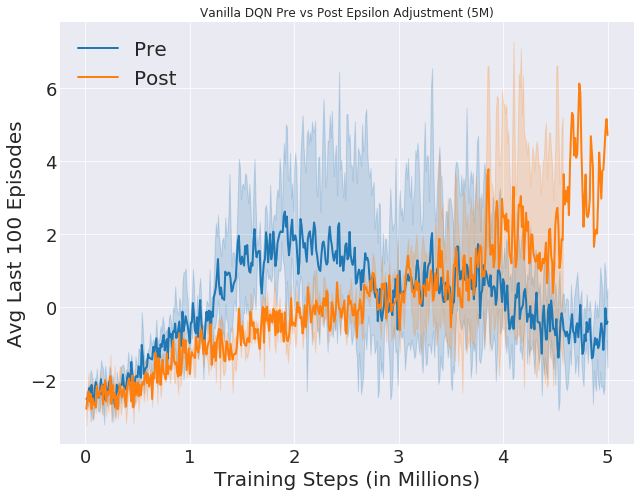

In [2]:
# 5m vanilla with previous epsilon and adjusted epsilon
trials = {
    "Pre": [
        'pre_adjusted_epsilon/dqn_fruitbot_29-04-2020_20-21-32',
        'pre_adjusted_epsilon/dqn_fruitbot_28-04-2020_19-22-33',
        'pre_adjusted_epsilon/dqn_fruitbot_27-04-2020_20-25-37'
      ],
    "Post": [
        '100k_per_level/no_params/dqn_fruitbot_30-04-2020_09-05-56', 
        '100k_per_level/no_params/dqn_fruitbot_30-04-2020_20-23-52',
    ]
}

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials, 
     title="Vanilla DQN Pre vs Post Epsilon Adjustment (5M)",
     savepath='figures/epsilon_adjustment.jpg')

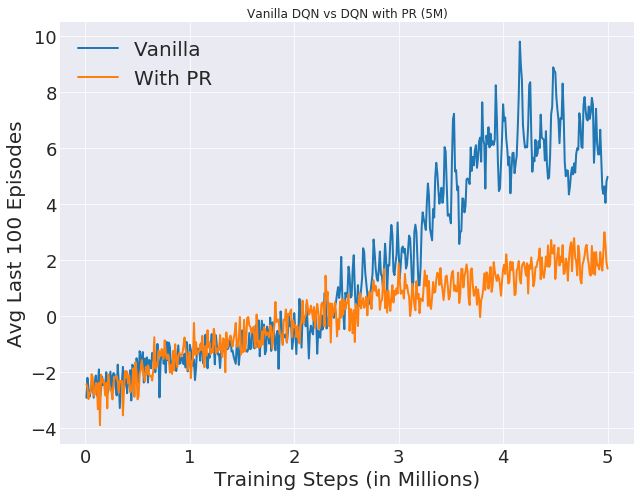

In [5]:
# 5m pr and non pr comparison
trials = {
    "Vanilla": [
        '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34', 
    ],
    "With PR": [
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_05-05-2020_08-03-03',
    ]
}

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials, 
     title="Vanilla DQN vs DQN with PR (5M)",
     savepath='figures/pr.png')

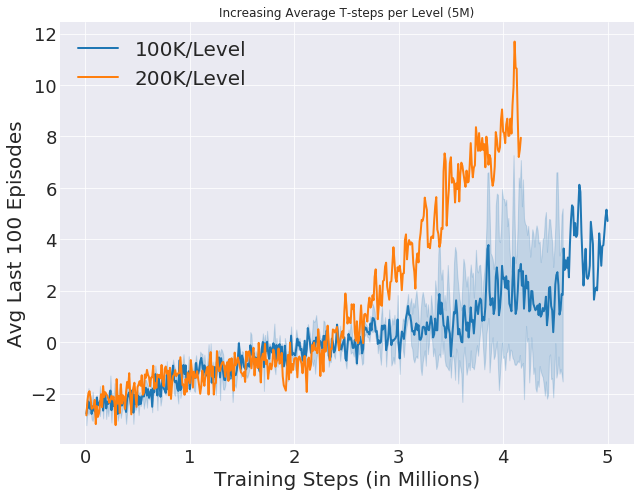

In [4]:
# 100k/level vs 200k/level
trials = {
    "100K/Level": [
        '100k_per_level/no_params/dqn_fruitbot_30-04-2020_09-05-56',
        '100k_per_level/no_params/dqn_fruitbot_30-04-2020_20-23-52',
    ],
    "200K/Level": [
        '200k_per_level/dqn_fruitbot_01-05-2020_09-29-59'
    ]
}

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials, title="Increasing Average T-steps per Level (5M)")

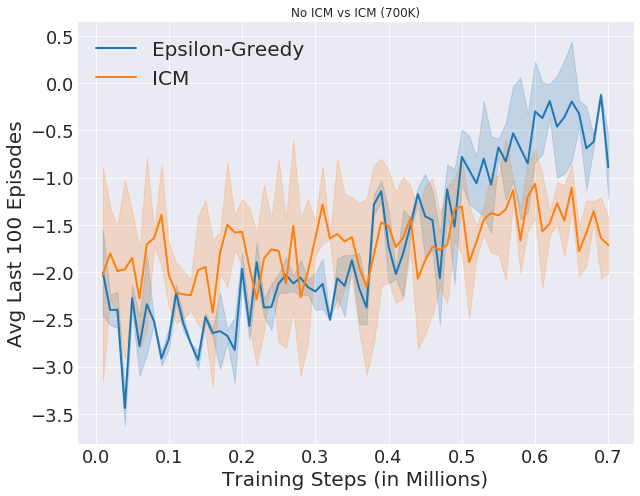

In [14]:
# ICM
trials = {
    "Epsilon-Greedy": [
        '700k_total/dqn_fruitbot_29-04-2020_07-16-11',
        '700k_total/dqn_fruitbot_29-04-2020_06-12-25'
    ],
    "ICM": [
        '700k_total_icm_no_greedy/dqn_icm_fruitbot_30-04-2020_04-03-03',
        '700k_total_icm_no_greedy/dqn_icm_fruitbot_30-04-2020_05-44-45'
    ]

}

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials, title="No ICM vs ICM (700K)", savepath='figures/icm.png')

# Test

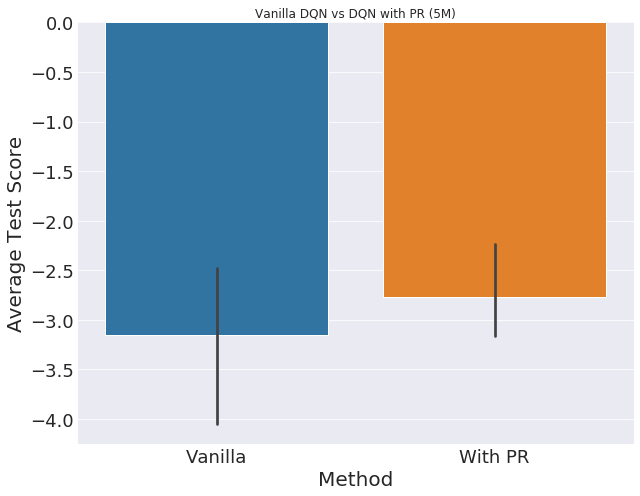

In [4]:
# 5m vanilla with previous epsilon and adjusted epsilon
trials = {
    "Vanilla": [
       '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34',
        '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34_copy1',
        '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34_copy2',
        '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34_copy3',
        '100k_per_level/500000_buffer_size/dqn_fruitbot_13-05-2020_05-05-34_copy4',
    ],
    "With PR": [
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_04-05-2020_20-50-16',
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_05-05-2020_08-03-03',
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_05-05-2020_21-58-59',
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_06-05-2020_09-26-59',
       '100k_per_level/500000_buffer_size/dqn_pr_fruitbot_06-05-2020_20-46-40',
    ]
}

plot_test(logdir='data_dqn', env='fruitbot', num_levels="50", trials=trials, 
     title="Vanilla DQN vs DQN with PR (5M)",
     savepath='figures/pr_test.png')

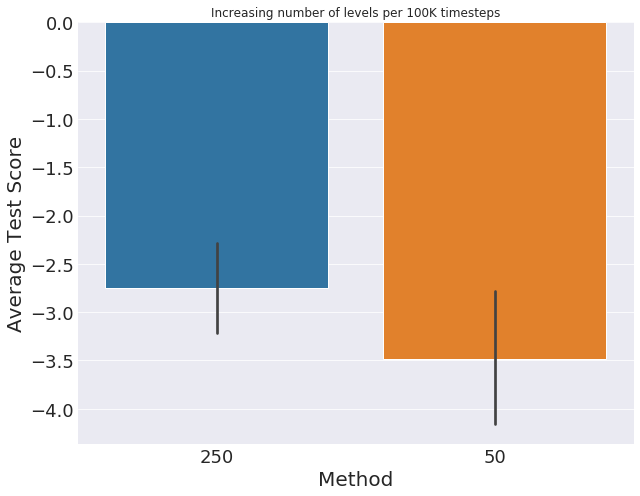

In [6]:
# 50, 100, vs 250 levels
trials = {
    "50": [
        '100k_per_level/dqn_fruitbot_13-05-2020_12-39-37',
        '100k_per_level/dqn_fruitbot_13-05-2020_12-39-37_copy1',
        '100k_per_level/dqn_fruitbot_13-05-2020_12-39-37_copy2'
    ],
    "250": [
        '100k_per_level/dqn_fruitbot_11-05-2020_04-19-16',
        '100k_per_level/dqn_fruitbot_07-05-2020_22-36-46',
    ]
}

plot_test(logdir='data_dqn', env='fruitbot', num_levels="", trials=trials, 
     title="Increasing number of levels per 100K timesteps",
     savepath='figures/baseline_test.png')